# 1. Know the data
# Importing libraries

In [9]:
import numpy as np
import pandas as pd

#Importing tools for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
#Import evaluation metric librarie s
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import LabelEncoder
#Libraries used for data  prprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb #Xtreme Gradient Boosting
#librries used for ignore warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset Loading

In [11]:
penguin=pd.read_csv(r"C:\Users\lakshita\Downloads\archive\penguins.csv")
# Load the penguin dataset
penguin = sns.load_dataset("penguins")

# Drop rows with missing values
penguin = penguin.dropna()

# Select only the numerical columns for correlation matrix
penguin_numeric = penguin.select_dtypes(include=['float64', 'int64'])

# Dataset First View

In [13]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [14]:
penguin.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [15]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


# Dataset rows and column count

In [17]:
# Correcting the use of iris.info()
print(penguin.info())
print("Number of rows ", penguin.shape[0])
print("Number of Columns ",penguin.shape[1])
print(penguin.head(150))

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None
Number of rows  333
Number of Columns  7
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19

# Dataset information 

In [19]:
#Checking information about the dataset using information 
penguin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Duplicate rows

In [21]:
dup=penguin.duplicated().sum()
print(f'Number of duplicate rows:{dup}')

Number of duplicate rows:0


# Dropping duplicate rows

In [23]:
#dropping duplicate rows
penguin=penguin.drop_duplicates()

# After Droppng Duplicates

In [25]:
#Checking the number of rows again to see if duplicates were dropped
print(f'Number of rows after dropping duplicates : {penguin.shape[0]}')

Number of rows after dropping duplicates : 333


# Count Plot For The Species Distribution

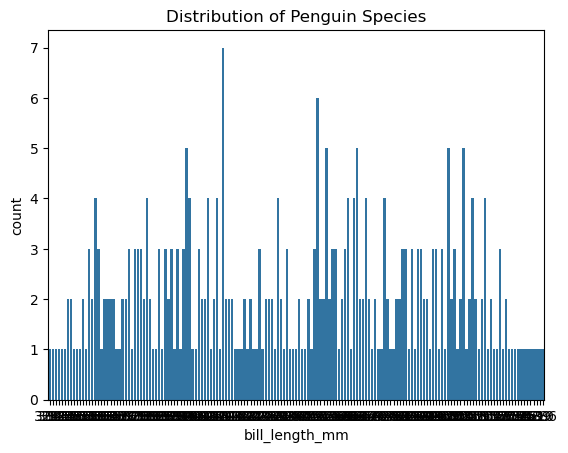

In [27]:
#count plot for the species distribution
sns.countplot(data=penguin,x='bill_length_mm')
plt.title('Distribution of Penguin Species')
plt.show()

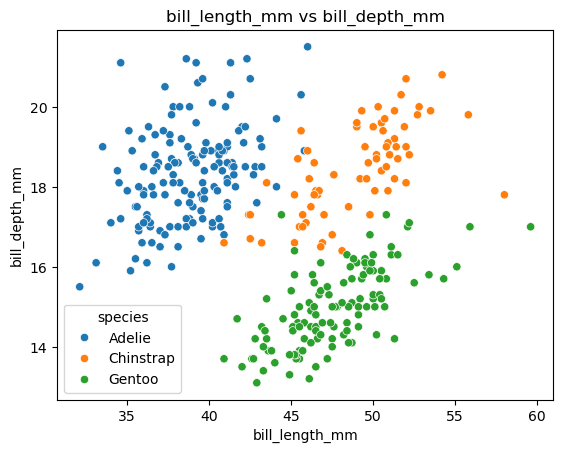

In [28]:
#Scatter plot for bill_length_mm vs bill_depth_mm
sns.scatterplot(data=penguin,x='bill_length_mm',y='bill_depth_mm',hue='species')
plt.title('bill_length_mm vs bill_depth_mm')
plt.show()

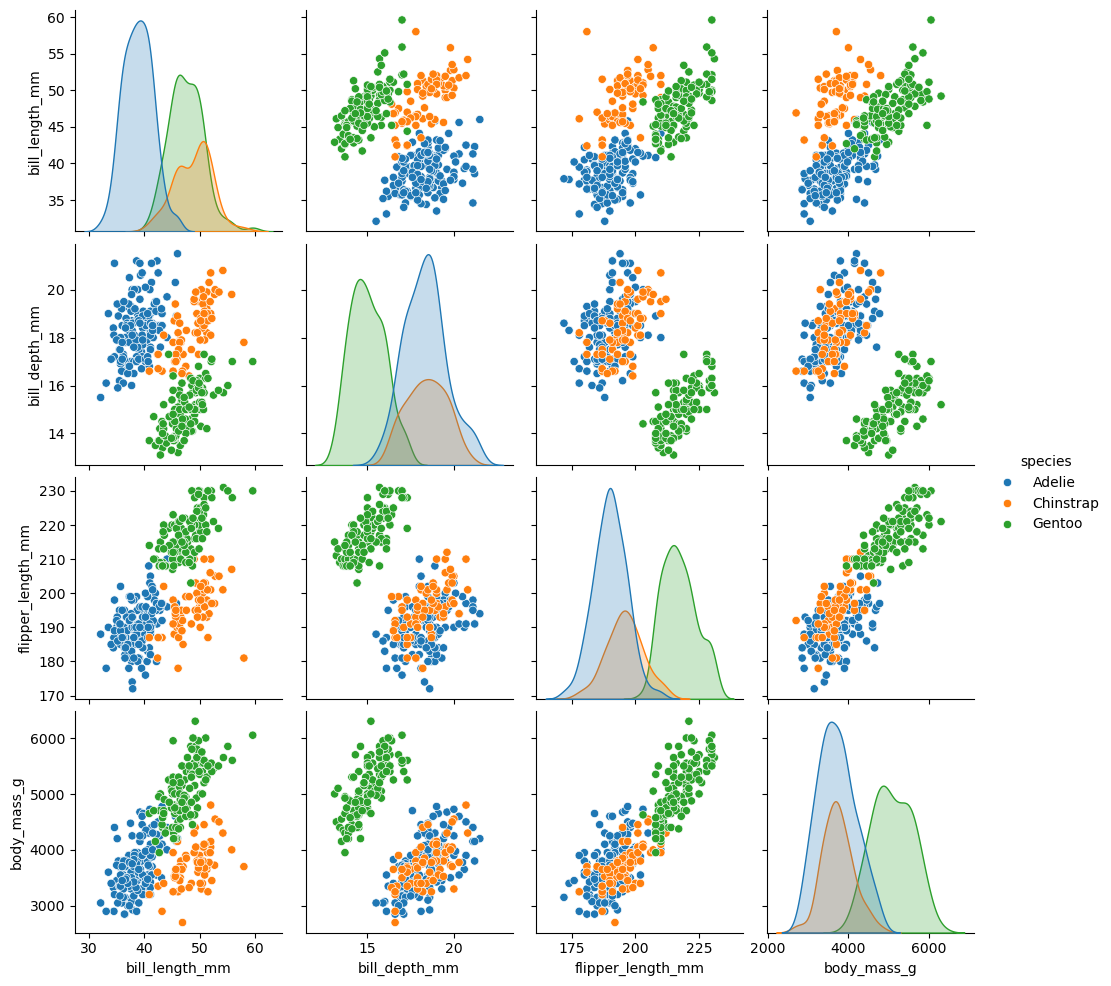

In [29]:
# Pair plot for visualizing relationships between all features
sns.pairplot(penguin, hue='species')
plt.show()

In [30]:
#checking number of rows and column of the dataset using shape
print("Number of rows:",penguin.shape[0])
print("Number of columns:",penguin.shape[1])

Number of rows: 333
Number of columns: 7


# Missing Value/NULL Values

In [32]:
penguin.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# 2. Understanding The Variables

In [34]:
#Dataset Columns
penguin.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [35]:
penguin.describe(include='all').round(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.00,333.00,333.00,333.00,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.99,17.16,200.97,4207.06,NaN
std,NaN,NaN,5.47,1.97,14.02,805.22,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.50,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.50,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.60,18.70,213.00,4775.00,NaN


# Check Unique Values For EachVariables

In [37]:
# Check unique values for each variables
for i in penguin.columns.tolist():
    print(" Number of unique values in",i,"is",penguin[i].nunique())

 Number of unique values in species is 3
 Number of unique values in island is 3
 Number of unique values in bill_length_mm is 163
 Number of unique values in bill_depth_mm is 79
 Number of unique values in flipper_length_mm is 54
 Number of unique values in body_mass_g is 93
 Number of unique values in sex is 2


# 3. Data Wrangling
# Data Wrangling Code

In [39]:
# IF We don't need the 1st column so lets drop that 
penguin = penguin.drop('island', axis=1)  # Drop the 'island' column

In [40]:
# New updated dataset
penguin.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,Male
1,Adelie,39.5,17.4,186.0,3800.0,Female
2,Adelie,40.3,18.0,195.0,3250.0,Female
4,Adelie,36.7,19.3,193.0,3450.0,Female
5,Adelie,39.3,20.6,190.0,3650.0,Male


# 4. Data Vizualization,Storytelling & Experimenting With Charts:Understand The Relationships Between Variables
# Chart 1 : Distribution Of Numerical Variables

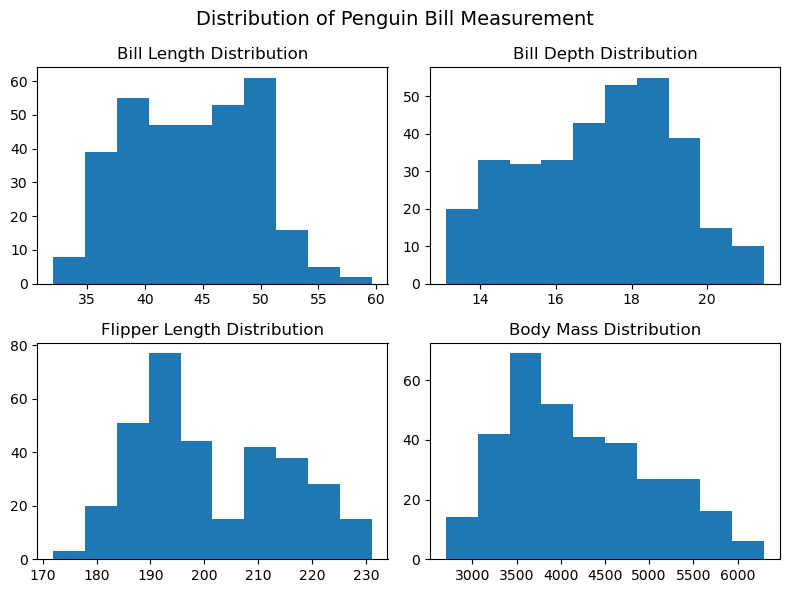

In [42]:
# chart 1 histrogram visual code for distribution of numerical variables
#create a figure with subject 
plt.figure(figsize=(8,6))
plt.suptitle('Distribution of Penguin Bill Measurement',fontsize=14)

#create a 2x2 grid of subplot
plt.subplot(2,2,1) # subject 1 (top-left)
plt.hist(penguin['bill_length_mm'])
plt.title('Bill Length Distribution')

plt.subplot(2,2,2) #subject 2 (top-right)
plt.hist(penguin['bill_depth_mm'])
plt.title('Bill Depth Distribution')

plt.subplot(2,2,3) #subject 3 (bottom-left)
plt.hist(penguin['flipper_length_mm'])
plt.title('Flipper Length Distribution')

plt.subplot(2,2,4) #subject 4 (bottom-right)
plt.hist(penguin['body_mass_g'])
plt.title('Body Mass Distribution')

#display the subjects
plt.tight_layout()
plt.show()

# Chart - 2 Scatter plot visualization code for Bill Length vs Bill depth.

In [44]:
#Define colours for each species and te corresponding species labels.
colors=['Purple','blue','pink']
species=['Adelie','Gentoo','Chinstrap']

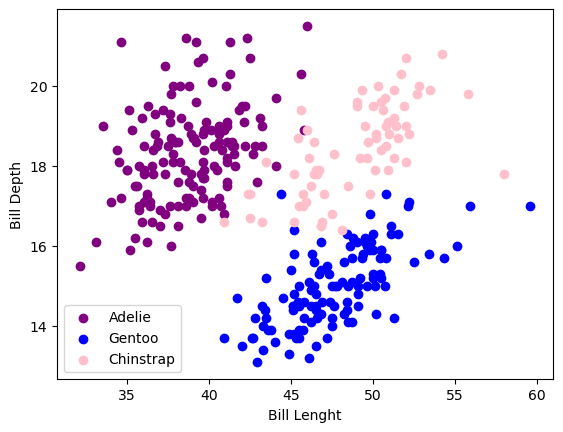

In [45]:
# Create a scatter plot for bill_length_mm vs bill_depth_mm for each species
for i in range(len(species)):
    #select data for the current species
    x=penguin[penguin['species']==species[i]]
    #create a scatter plot with the specified colors and labels for the current species.
    plt.scatter(x['bill_length_mm'],x['bill_depth_mm'],c=colors[i],label=species[i])

#Add labels to the x and y axes
plt.xlabel('Bill Lenght')
plt.ylabel('Bill Depth')

#Add a legend to identify species based on colors
plt.legend()

#Display the scatter plot
plt.show()

# Chart - 3 Scatter plot visualization code for Flipper Length vs Body Mass .

In [47]:
#Define colours for each species and te corresponding species labels.
colors=['black','grey','yellow']
species=['Adelie','Gentoo','Chinstrap']

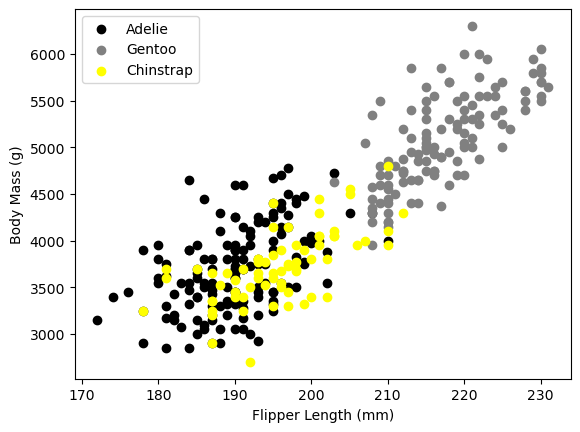

In [48]:
# create a scatter plot for flipper_length_mm vs body_mass_g for each species
for i in range(len(species)):
    # Select data for the current species.
    x = penguin[penguin['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['flipper_length_mm'], x['body_mass_g'], c=colors[i], label=species[i])

# Add labels to the x and y axes
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Chart - 4 Scatter plot visualization code for Bill Length vs Bill depth.

In [50]:
color=['yellow','pink','blue']
species=['Adelie','Gentoo','Chinstrap']

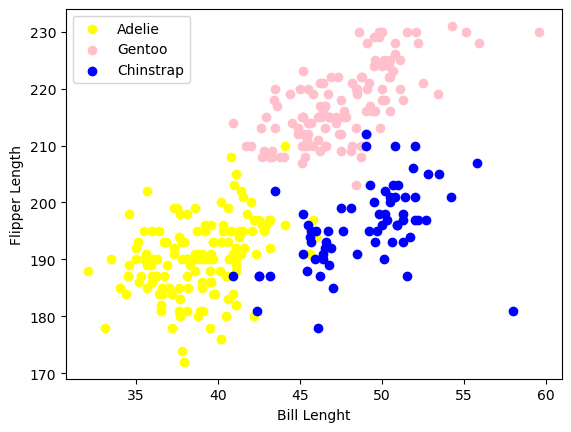

In [51]:
for i in range(len(species)):
    #select data for the current species
    x=penguin[penguin['species']==species[i]]
    #create a scatter plot with the specified colors and labels for the current species.
    plt.scatter(x['bill_length_mm'],x['flipper_length_mm'],c=color[i],label=species[i])

#Add labels to the x and y axes
plt.xlabel('Bill Lenght')
plt.ylabel('Flipper Length')

#Add a legend to identify species based on colors
plt.legend()

#Display the scatter plot
plt.show()

# Chart 5 : Bill depth vs body mass

In [53]:
color=['black','grey','pink']
species=['Adelie','Gentoo','Chinstrap']

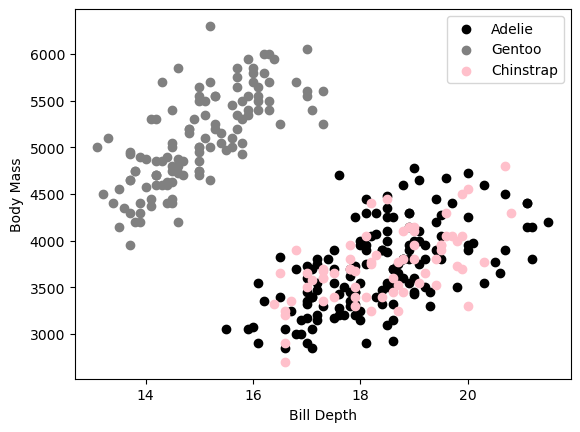

In [54]:
# create a scatter plot for flipper_length_mm vs body_mass_g for each species
for i in range(len(species)):
    # Select data for the current species.
    x = penguin[penguin['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['bill_depth_mm'], x['body_mass_g'], c=color[i], label=species[i])

# Add labels to the x and y axes
plt.xlabel('Bill Depth')
plt.ylabel('Body Mass')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Chart 6 Correlation HeatMap Visualization Code

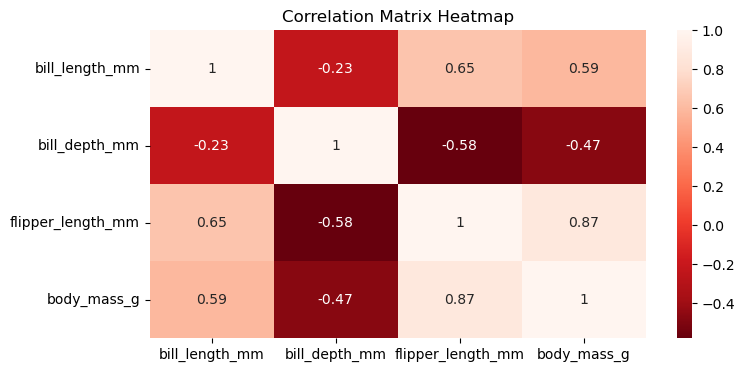

In [56]:
# Correlation Heatmap Visualization Code
corr_matrix = penguin_numeric.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix Heatmap')

# Display Chart
plt.show()

# 5. Feature Engineering & Data Preprocessing 
# Categorical Encoding


In [58]:
#Encode the categorical columns
#create a LabelEncoder object
le=LabelEncoder()

#Encode the "species"column to convert the species names to numerical names to numerical labels
penguin['species']=le.fit_transform(penguin['species'])

#check the unique values in the 'species' column after encoding
unique_species=penguin['species'].unique()

#Display the unique encoded values
print("Encoded Species Value:")
print(unique_species)   #'Adelie'==0,'Gentoo'==1,'Chinstrap'==2

# One-hot encode the 'sex' column
penguin = pd.get_dummies(penguin, columns=['sex'], drop_first=True)
# The 'sex' column will be replaced with a single binary column, 'sex_Male'

Encoded Species Value:
[0 1 2]


# Data Scaling

In [60]:
# Defining the X and y
x=penguin.drop(columns=['species'], axis=1)
y=penguin['species']

# 3. Data Splitting

In [62]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [63]:
# Checking the train distribution of dependent variable
y_train.value_counts()

species
0    111
2     73
1     49
Name: count, dtype: int64

# 6. ML Model Implementation

In [65]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
    '''The function will take model, x train , x test , y train,y test
    and then it will fit the model ,then make predictions on the trained model,
    it will then print roc-auc score of train and test ,then plot the roc , auc curve,
    print the confusion matrix for train and test ,then print classification report for trin and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train,recall_test,acc_train,acc_test ,F1_train,F1_test
    '''

    #fit the models to training data.
    model.fit(x_train,y_train)

    # make predictions on the test data 
    y_pred_train=model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #calculate confusion matrix
    cm_train = confusion_matrix(y_train,y_pred_train)
    cm_test = confusion_matrix(y_pred_test,y_pred_test)

    fig,ax=plt.subplots(1,2,figsize=(11,4))

    print("\nConfusion Matrix")
    sns.heatmap(cm_train,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'],cmap="Greens",fmt='.4g',ax=ax[0])
    ax[0].set_xlabel("Peridicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix ")

    sns.heatmap(cm_train,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'],cmap="Greens",fmt='.4g',ax=ax[1])
    ax[1].set_xlabel("Peridicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix ")

    plt.tight_layout()
    plt.show()

    # calculate classification report
    cr_train=classification_report(y_train,y_pred_train,output_dict=True)
    cr_test=classification_report(y_test,y_pred_test,output_dict=True)
    print("\nTrain Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

# Creating DataFrame

In [67]:
# Create a score dataframe
score=pd.DataFrame(index=['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# ML Model - 1 : Logistic regression

In [69]:
#Ml model -1 implementation
lr_model=LogisticRegression(fit_intercept=True,max_iter=1000)
# Model is trained (fit) and predicted in the evaluate model.

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix


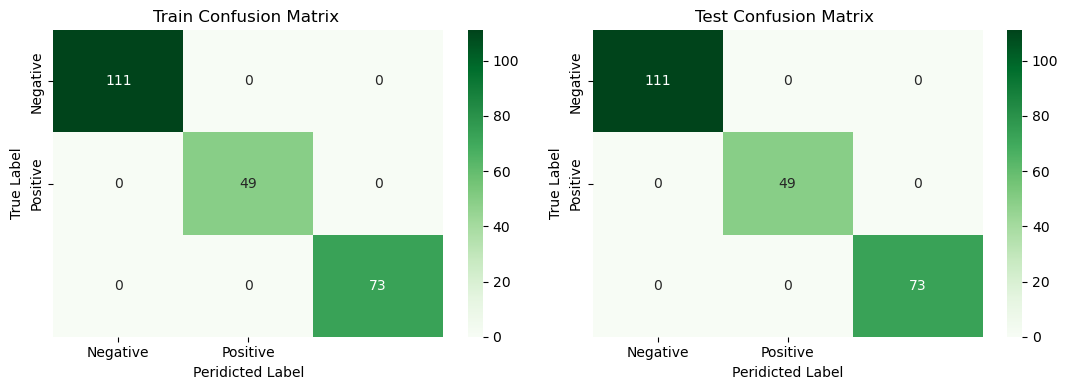


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 0.971429 |   0.985507 |     35    |
| 1            |    1        | 1        |   1        |     19    |
| 2            |    0.978723 | 1        |   0.989247 |     46    |
| accuracy     |    0.99     | 0.99     |   0.99     |      0.99 |
| macro avg    |    0.992908 | 0.990476 |   0.991585 |    100    |
| weighted avg |    0.990213 | 0.99     |   0.989981 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 0.971429 |   0.985507 |     35    |
| 1            |    1        | 1        |   1        |     19    |
| 2            |    0.978723 | 1        |   0.989247 |     46    |
| accuracy     |    0.99     | 0.99     |   0.99     |      0.99 |
| m

In [71]:
#Visualization evaluation metric score chart
lr_score= evaluate_model(lr_model,x_train,x_test,y_train,y_test)

In [72]:
# Updated Evaluation metric Score Chart
score['Logistic_Regression'] = lr_score
score

,Logistic_Regression
Precision Train,1.000000
Precision Test,0.990213
Recall Train,1.000000
Recall Test,0.990000
Accuracy Train,1.000000
Accuracy Test,0.990000
F1 macro Train,1.000000
F1 macro Test,0.989981


# 2. Cross- Validation & Hyperparameter Tuning

In [74]:
#Ml model -1 implementation with hyperparameter optimization techniques
#(ii.e, GridSearchCV,RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid={'C':[100,10,1,0,1,0.01,0.001,0.0001],
           'penalty':['11','12','elasticnet'],
            'l1_ratio':[0.5],'max_iter':[10000],
           'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

#initialization the logistic regression model.
logreg=LogisticRegression(fit_intercept=True,max_iter=10000,random_state=0)

#Repeated Stratified kfold
rskf=RepeatedStratifiedKFold(n_splits=3,n_repeats=4,random_state=0)

#using GridSearchCV tune the hyperparameter using cross-validation
grid= GridSearchCV(logreg,param_grid,cv=rskf)
grid.fit(x_train,y_train)

#Select the best hyperparameters found by GridSearchCV
best_params=grid.best_params_
print("Best Hyperparameters:",best_params)

Best Hyperparameters: {'C': 100, 'l1_ratio': 0.5, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'}


In [75]:
#initiate model with best parameters
lr_model2=LogisticRegression(C=best_params['C'],
                             penalty=best_params['penalty'],
                             l1_ratio=best_params['l1_ratio'],
                            solver=best_params['solver'],
                            max_iter=10000,random_state=0)


Confusion Matrix


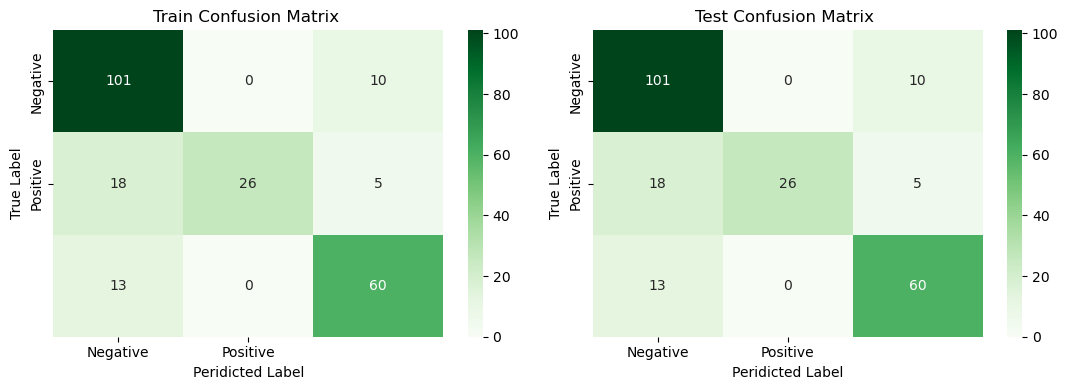


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.790698 | 0.971429 |   0.871795 |      35   |
| 1            |    1        | 0.894737 |   0.944444 |      19   |
| 2            |    0.975    | 0.847826 |   0.906977 |      46   |
| accuracy     |    0.9      | 0.9      |   0.9      |       0.9 |
| macro avg    |    0.921899 | 0.904664 |   0.907739 |     100   |
| weighted avg |    0.915244 | 0.9      |   0.901782 |     100   |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.790698 | 0.971429 |   0.871795 |      35   |
| 1            |    1        | 0.894737 |   0.944444 |      19   |
| 2            |    0.975    | 0.847826 |   0.906977 |      46   |
| accuracy     |    0.9      | 0.9      |   0.9      |       0.9 |
| m

In [76]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [77]:
score['logistic_regression tuned'] = lr_score2
# Updated Evaluation metric Score Chart
score

,Logistic_Regression,logistic_regression tuned
Precision Train,1.000000,0.825458
Precision Test,0.990213,0.915244
Recall Train,1.000000,0.802575
Recall Test,0.990000,0.900000
Accuracy Train,1.000000,0.802575
Accuracy Test,0.990000,0.900000
F1 macro Train,1.000000,0.795855
F1 macro Test,0.989981,0.901782


# ML MOdel -2 Decision Tree

In [79]:
# ML Model-2 Implementationdt
dt_model=DecisionTreeClassifier(random_state=20)
#Model is trained (fit) and predicted in the 

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix


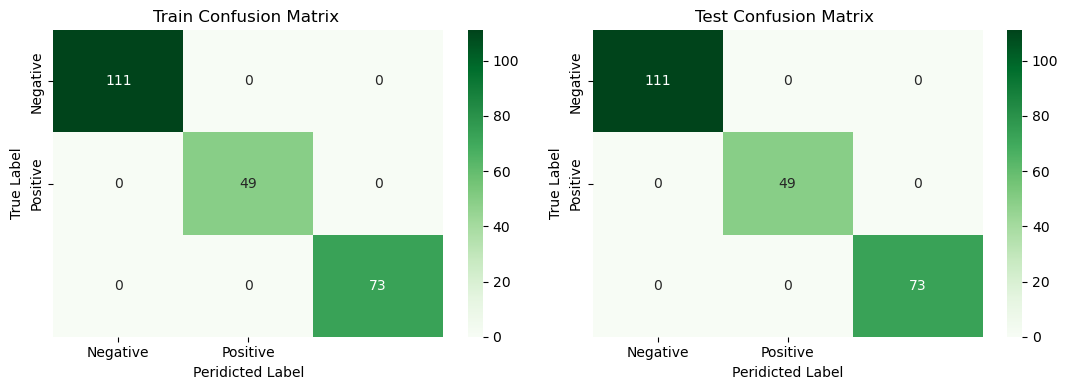


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.942857 | 0.942857 |   0.942857 |     35    |
| 1            |    0.9      | 0.947368 |   0.923077 |     19    |
| 2            |    0.977778 | 0.956522 |   0.967033 |     46    |
| accuracy     |    0.95     | 0.95     |   0.95     |      0.95 |
| macro avg    |    0.940212 | 0.948916 |   0.944322 |    100    |
| weighted avg |    0.950778 | 0.95     |   0.95022  |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.942857 | 0.942857 |   0.942857 |     35    |
| 1            |    0.9      | 0.947368 |   0.923077 |     19    |
| 2            |    0.977778 | 0.956522 |   0.967033 |     46    |
| accuracy     |    0.95     | 0.95     |   0.95     |      0.95 |
| m

In [81]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [82]:
# Updated Evaluation metric Score Chart
score['decision_tree'] = dt_score
score

,Logistic_Regression,logistic_regression tuned,decision_tree
Precision Train,1.000000,0.825458,1.000000
Precision Test,0.990213,0.915244,0.950778
Recall Train,1.000000,0.802575,1.000000
Recall Test,0.990000,0.900000,0.950000
Accuracy Train,1.000000,0.802575,1.000000
Accuracy Test,0.990000,0.900000,0.950000
F1 macro Train,1.000000,0.795855,1.000000
F1 macro Test,0.989981,0.901782,0.950220


# 2. Cross Validation & Hyperparameter Tuning

In [84]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("best_hyperparameters: ", best_params)

best_hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}



Confusion Matrix


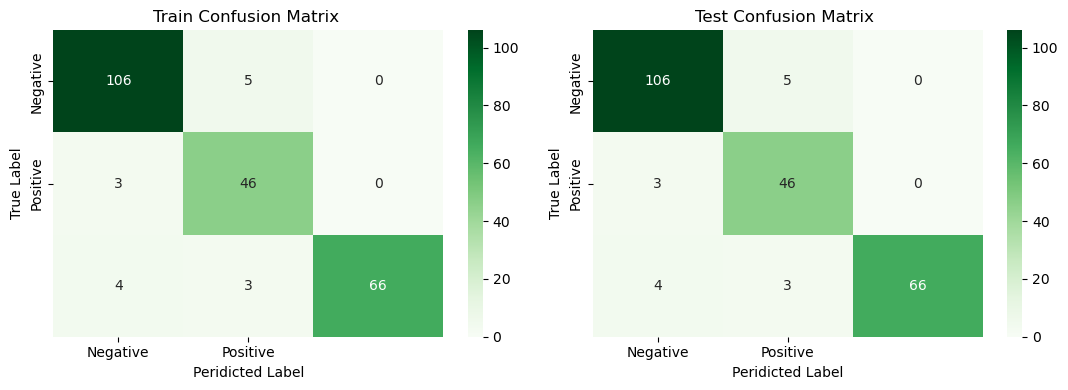


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.853659 | 1        |   0.921053 |     35    |
| 1            |    0.761905 | 0.842105 |   0.8      |     19    |
| 2            |    0.973684 | 0.804348 |   0.880952 |     46    |
| accuracy     |    0.88     | 0.88     |   0.88     |      0.88 |
| macro avg    |    0.863083 | 0.882151 |   0.867335 |    100    |
| weighted avg |    0.891437 | 0.88     |   0.879607 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.853659 | 1        |   0.921053 |     35    |
| 1            |    0.761905 | 0.842105 |   0.8      |     19    |
| 2            |    0.973684 | 0.804348 |   0.880952 |     46    |
| accuracy     |    0.88     | 0.88     |   0.88     |      0.88 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned
Precision Train,1.000000,0.825458,1.000000,0.939333
Precision Test,0.990213,0.915244,0.950778,0.891437
Recall Train,1.000000,0.802575,1.000000,0.935622
Recall Test,0.990000,0.900000,0.950000,0.880000
Accuracy Train,1.000000,0.802575,1.000000,0.935622
Accuracy Test,0.990000,0.900000,0.950000,0.880000
F1 macro Train,1.000000,0.795855,1.000000,0.936242
F1 macro Test,0.989981,0.901782,0.950220,0.879607


In [85]:
#Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)
                                  
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

score['decision_tree_tuned'] = dt2_score
# Updated Evaluation metric Score Chart
score

# ML Model - 3 : Random Forest

In [87]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation Metric Score Chart.


Confusion Matrix


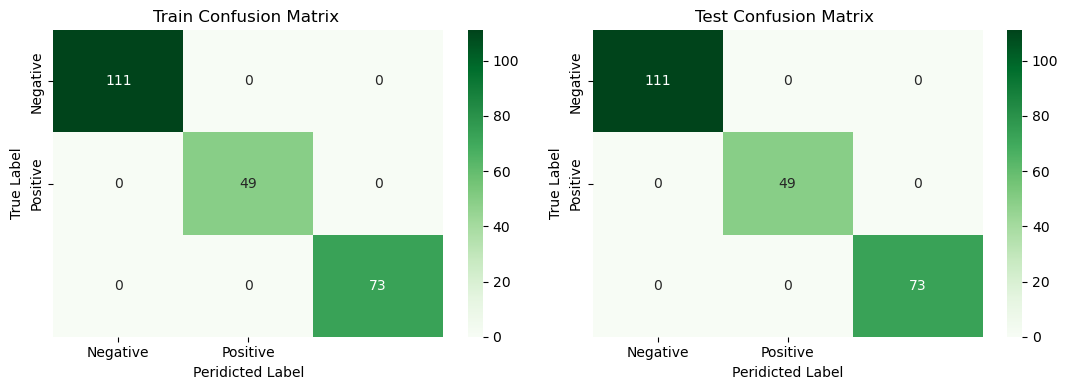


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |        46 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       100 |
| weighted avg |           1 |        1 |          1 |       100 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |        46 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0


In [89]:
#visualization evaluation metric score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

# Updated Evaluation metric Score Chart
score['random_forest'] = rf_score
score

# 2. Cross- Validation & Hyperparameter Tuning

best_hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 11}

Confusion Matrix


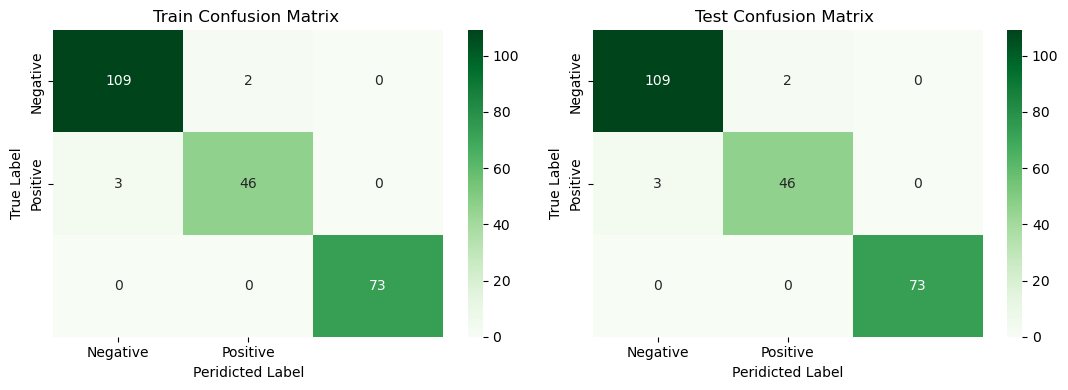


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg    |    0.981982 | 0.964912 |   0.972222 |    100    |
| weighted avg |    0.981081 | 0.98     |   0.979722 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722


In [91]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)

# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

score['random_forest_tuned'] = rf2_score
#Updated Evaluation metric Score Chart
score


# ML Model - 4 : SVM (Support Vector Machine)

In [93]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix


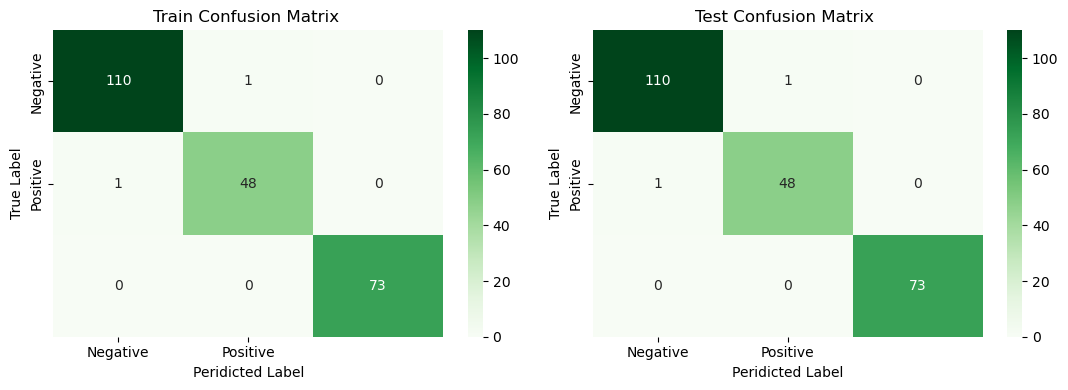


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |        46 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       100 |
| weighted avg |           1 |        1 |          1 |       100 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        19 |
| 2            |           1 |        1 |          1 |        46 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000


In [95]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)
#Updated Evaluation metric Score Chart
score['s_v_m'] = svm_score
score

# ML Model - 5 : Xtreme Gradient Boosting

In [97]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()
# Model is trained (fit) and predicted in the evaluate model

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix


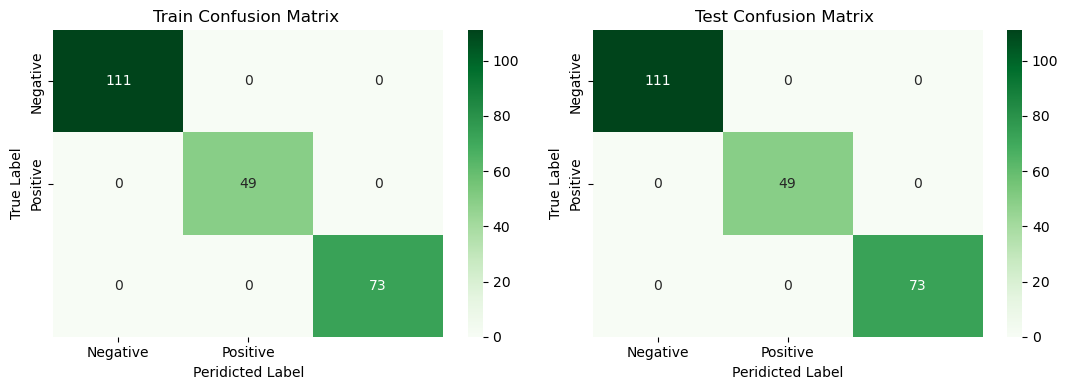


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |     35    |
| 1            |    0.95     | 1        |   0.974359 |     19    |
| 2            |    1        | 0.978261 |   0.989011 |     46    |
| accuracy     |    0.99     | 0.99     |   0.99     |      0.99 |
| macro avg    |    0.983333 | 0.992754 |   0.98779  |    100    |
| weighted avg |    0.9905   | 0.99     |   0.990073 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |     35    |
| 1            |    0.95     | 1        |   0.974359 |     19    |
| 2            |    1        | 0.978261 |   0.989011 |     46    |
| accuracy     |    0.99     | 0.99     |   0.99     |      0.99 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073


In [99]:
#Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)
# Updated Evaluation metric Score Chart
score['x_g_b'] = xgb_score
score

# 2. Cross- Validation & Hyperparameter Tuning

best_hyperparameters:  {'n_estimators': 160, 'max_depth': 13, 'learning_rate': 0.11}

Confusion Matrix


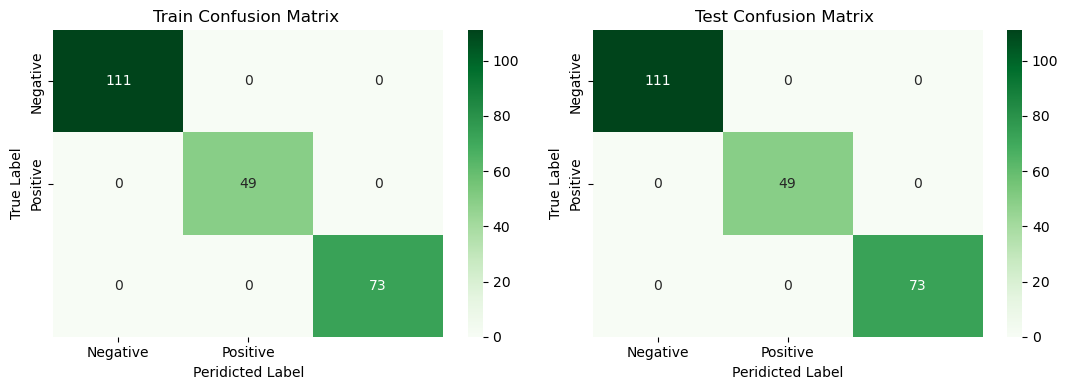


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.972222 | 1        |   0.985915 |     35    |
| 1            |    0.95     | 1        |   0.974359 |     19    |
| 2            |    1        | 0.956522 |   0.977778 |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg    |    0.974074 | 0.985507 |   0.979351 |    100    |
| weighted avg |    0.980778 | 0.98     |   0.979976 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.972222 | 1        |   0.985915 |     35    |
| 1            |    0.95     | 1        |   0.974359 |     19    |
| 2            |    1        | 0.956522 |   0.977778 |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b,x_g_b_tuned
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000,1.000000
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500,0.980778
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000,1.000000
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073,0.979976


In [101]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)

# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

score['x_g_b_tuned'] = xgb2_score
# Updated Evaluation metric Score Chart
score

# ML Model - 6 : Naive Bayes


Confusion Matrix


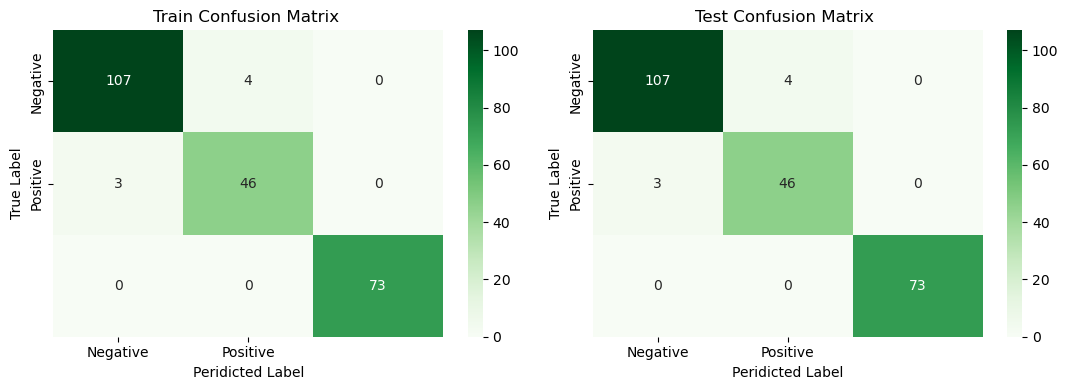


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg    |    0.981982 | 0.964912 |   0.972222 |    100    |
| weighted avg |    0.981081 | 0.98     |   0.979722 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b,x_g_b_tuned,naive_bayes
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000,1.000000,0.970183
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500,0.980778,0.981081
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000,1.000000,0.970041
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073,0.979976,0.979722


In [103]:
# Ml Model - 6 Implementation 
nb_model=GaussianNB()
# Model is trained (fit) and predicted in the evaluate model 

#Visualization evaluation Metric Score Chart 
nb_score=evaluate_model(nb_model,x_train,x_test,y_train,y_test)

# Updated Evaluation metric Score Chart 
score['naive_bayes']=nb_score
score

# 2. Cross- Validation & Hyperparameter Tuning

best_hyperparameters:  {'var_smoothing': 2.310129700083158e-07}

Confusion Matrix


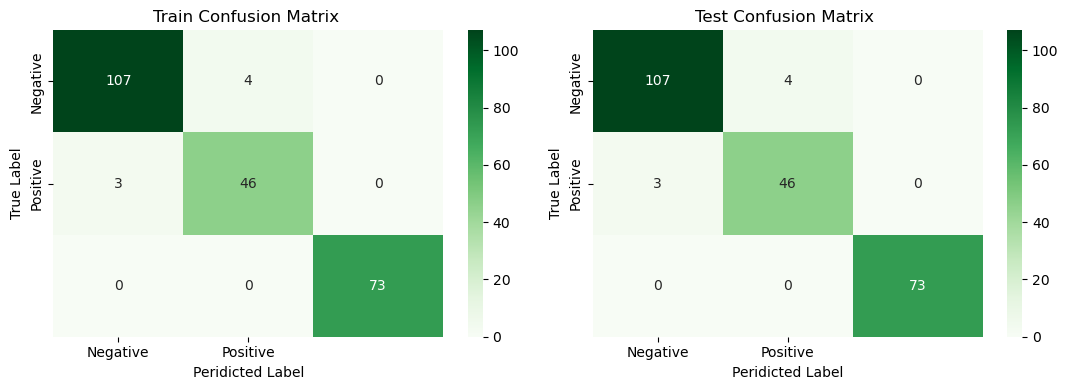


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg    |    0.981982 | 0.964912 |   0.972222 |    100    |
| weighted avg |    0.981081 | 0.98     |   0.979722 |    100    |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.945946 | 1        |   0.972222 |     35    |
| 1            |    1        | 0.894737 |   0.944444 |     19    |
| 2            |    1        | 1        |   1        |     46    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| m

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000,1.000000,0.970183,0.970183
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500,0.980778,0.981081,0.981081
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000,1.000000,0.970041,0.970041
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073,0.979976,0.979722,0.979722


In [105]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("best_hyperparameters: ", best_params)

# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])

# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

score['naive_bayes_tuned']= nb2_score
# Updated Evaluation metric Score Chart
score

# ML Model-7 Neural Network 

In [107]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)
# Model is trained (fit) and predicted in the evaluate model

# 1 Explain the ML Model used and its performance using Evaluation Metric Score Chart.


Confusion Matrix


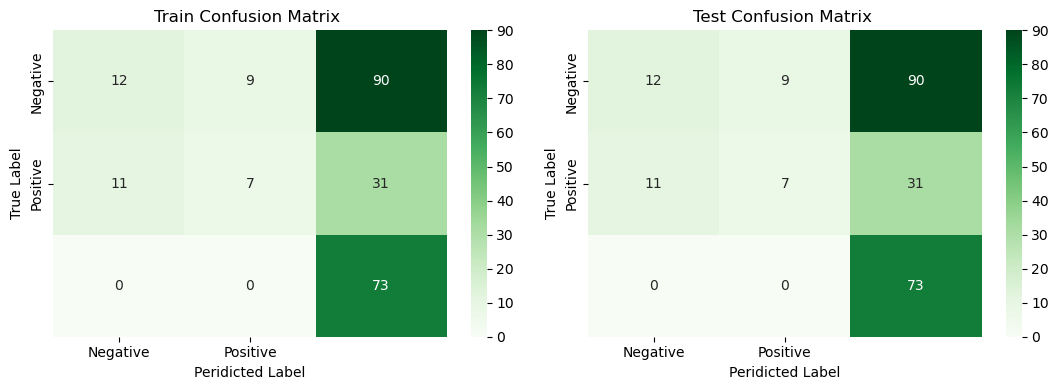


Train Classification Report:
|              |   precision |    recall |   f1-score |   support |
|:-------------|------------:|----------:|-----------:|----------:|
| 0            |    0.5      | 0.0571429 |   0.102564 |     35    |
| 1            |    0.533333 | 0.421053  |   0.470588 |     19    |
| 2            |    0.567901 | 1         |   0.724409 |     46    |
| accuracy     |    0.56     | 0.56      |   0.56     |      0.56 |
| macro avg    |    0.533745 | 0.492732  |   0.432521 |    100    |
| weighted avg |    0.537568 | 0.56      |   0.458538 |    100    |

Test Classification Report:
|              |   precision |    recall |   f1-score |   support |
|:-------------|------------:|----------:|-----------:|----------:|
| 0            |    0.5      | 0.0571429 |   0.102564 |     35    |
| 1            |    0.533333 | 0.421053  |   0.470588 |     19    |
| 2            |    0.567901 | 1         |   0.724409 |     46    |
| accuracy     |    0.56     | 0.56      |   0.56     |  

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned,neural_network
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000,1.000000,0.970183,0.970183,0.458453
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500,0.980778,0.981081,0.981081,0.537568
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957,0.394850
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000,0.560000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957,0.394850
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000,0.560000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000,1.000000,0.970041,0.970041,0.301940
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073,0.979976,0.979722,0.979722,0.458538


In [109]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

# Updated Evaluation metric Score Chart
score['neural_network'] = neural_score
score

# 2. Cross- Validation & Hyperparameter Tuning

best_hyperparameters:  {'hidden_layer_sizes': 40, 'alpha': 0.0071}

Confusion Matrix


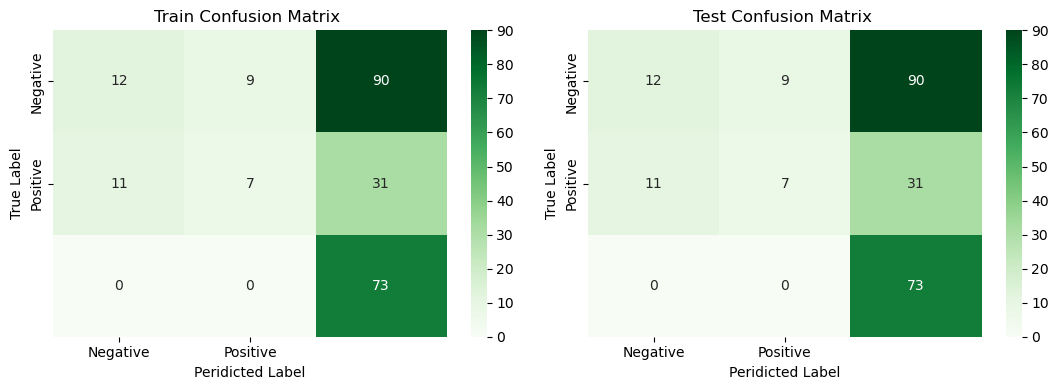


Train Classification Report:
|              |   precision |    recall |   f1-score |   support |
|:-------------|------------:|----------:|-----------:|----------:|
| 0            |    0.5      | 0.0571429 |   0.102564 |     35    |
| 1            |    0.533333 | 0.421053  |   0.470588 |     19    |
| 2            |    0.567901 | 1         |   0.724409 |     46    |
| accuracy     |    0.56     | 0.56      |   0.56     |      0.56 |
| macro avg    |    0.533745 | 0.492732  |   0.432521 |    100    |
| weighted avg |    0.537568 | 0.56      |   0.458538 |    100    |

Test Classification Report:
|              |   precision |    recall |   f1-score |   support |
|:-------------|------------:|----------:|-----------:|----------:|
| 0            |    0.5      | 0.0571429 |   0.102564 |     35    |
| 1            |    0.533333 | 0.421053  |   0.470588 |     19    |
| 2            |    0.567901 | 1         |   0.724409 |     46    |
| accuracy     |    0.56     | 0.56      |   0.56     |  

,Logistic_Regression,logistic_regression tuned,decision_tree,decision_tree_tuned,random_forest,random_forest_tuned,s_v_m,x_g_b,x_g_b_tuned,naive_bayes,naive_bayes_tuned,neural_network,neural_network_tuned
Precision Train,1.000000,0.825458,1.000000,0.939333,1.0,0.978477,0.991416,1.000000,1.000000,0.970183,0.970183,0.458453,0.458453
Precision Test,0.990213,0.915244,0.950778,0.891437,1.0,0.981081,1.000000,0.990500,0.980778,0.981081,0.981081,0.537568,0.537568
Recall Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957,0.394850,0.394850
Recall Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000,0.560000,0.560000
Accuracy Train,1.000000,0.802575,1.000000,0.935622,1.0,0.978541,0.991416,1.000000,1.000000,0.969957,0.969957,0.394850,0.394850
Accuracy Test,0.990000,0.900000,0.950000,0.880000,1.0,0.980000,1.000000,0.990000,0.980000,0.980000,0.980000,0.560000,0.560000
F1 macro Train,1.000000,0.795855,1.000000,0.936242,1.0,0.978478,0.991416,1.000000,1.000000,0.970041,0.970041,0.301940,0.301940
F1 macro Test,0.989981,0.901782,0.950220,0.879607,1.0,0.979722,1.000000,0.990073,0.979976,0.979722,0.979722,0.458538,0.458538


In [111]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("best_hyperparameters: ", best_params)

# Initiate model with best hyperparameters
nn_model2=MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                      alpha=best_params['alpha'],
                      random_state =0)
# Visualization Evaluation Metric Score Chart
neural2_score=evaluate_model(nn_model,x_train,x_test,y_train,y_test)

score['neural_network_tuned']=neural2_score
#Updated Evaluation Metric Score Chart
score

# **MarkDown**

In [113]:
print(score.to_markdown())

|                 |   Logistic_Regression |   logistic_regression tuned |   decision_tree |   decision_tree_tuned |   random_forest |   random_forest_tuned |    s_v_m |    x_g_b |   x_g_b_tuned |   naive_bayes |   naive_bayes_tuned |   neural_network |   neural_network_tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|---------:|--------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              1        |                    0.825458 |        1        |              0.939333 |               1 |              0.978477 | 0.991416 | 1        |      1        |      0.970183 |            0.970183 |         0.458453 |               0.458453 |
| Precision Test  |              0.990213 |                    0.915244 |        0.950778 |              0.891437 |               1 |              0.981081 | 1       

# Selection Of Best Model

In [115]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

abc = score_t.drop(remove_models)                     # creating a new dataframe with required models
abc

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
logistic_regression tuned,0.825458,0.915244,0.802575,0.90,0.802575,0.90,0.795855,0.901782
decision_tree_tuned,0.939333,0.891437,0.935622,0.88,0.935622,0.88,0.936242,0.879607
random_forest_tuned,0.978477,0.981081,0.978541,0.98,0.978541,0.98,0.978478,0.979722
naive_bayes,0.970183,0.981081,0.969957,0.98,0.969957,0.98,0.970041,0.979722
naive_bayes_tuned,0.970183,0.981081,0.969957,0.98,0.969957,0.98,0.970041,0.979722
neural_network,0.458453,0.537568,0.394850,0.56,0.394850,0.56,0.301940,0.458538
neural_network_tuned,0.458453,0.537568,0.394850,0.56,0.394850,0.56,0.301940,0.458538


In [116]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']
best_models = select_best_model(abc, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {abc[metric+' Test'][best_model].round(4)}")

# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

The best models are:
Precision: random_forest_tuned - 0.9811
Recall: random_forest_tuned - 0.98
Accuracy: random_forest_tuned - 0.98
F1 macro: random_forest_tuned - 0.9797
| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| logistic_regression tuned |       0.802575 |          0.9  |
| decision_tree_tuned       |       0.935622 |          0.88 |
| random_forest_tuned       |       0.978541 |          0.98 |
| naive_bayes               |       0.969957 |          0.98 |
| naive_bayes_tuned         |       0.969957 |          0.98 |
| neural_network            |       0.39485  |          0.56 |
| neural_network_tuned      |       0.39485  |          0.56 |


# Explain the model which have used for the prediction

In [118]:
# Define a list of category labels for reference.
Category_RF = ['Adelie','Gentoo','Chinstrap']

# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2,0]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Convert the prediction to an integer and access the correct label from Category_RF
predicted_label = Category_RF[int(x_rf_prediction[0])]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Adelie


# Testing Accuracy

In [120]:
# Evaluate the model 
accuracy = rf_model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 1.0


# Saving iris_flower_model.pkl as file

In [191]:
# After training, add this code to save the model:
import pickle
with open('penguin_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)  # Save the trained model to a file

# Once you run the cell with this code, 'penguin_model.pkl' will be created in your folder
